In [2]:
# imports
import re
import spacy
import en_core_web_sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from IPython.core.interactiveshell import InteractiveShell
from tqdm.notebook import tqdm
from scipy.ndimage import gaussian_filter1d
from tvDatafeed import TvDatafeed, Interval

In [3]:
# import configurations
sp = spacy.load('en_core_web_sm')
nlp = en_core_web_sm.load()
InteractiveShell.ast_node_interactivity = "all"
tqdm.pandas()

In [4]:
# read file
df = pd.read_pickle("../data/cleaned/tweets_verified_2020-2021_cleaned.pkl")
df.head()

,created_at,id,conversation_id,user_id,username,name,tweet,language,mentions,urls,...,retweets_count,likes_count,hashtags,cashtags,link,quote_url,video,thumbnail,reply_to,tweet_clean
0,2020-01-01 00:08:28-05:00,1212239143687741440,1212239143687741440,20646945,dumbfoundead,dumbfoundead.eth,Bitcoin the worst decision i made this decade,en,[],[],...,15,409,[],[],https://twitter.com/dumbfoundead/status/121223...,<NA>,False,<NA>,[],worst decision made decade
1,2020-01-01 00:54:35-05:00,1212250748815208448,1212250748815208448,636023721,neuroecology,Adam J Calhoun,If you ask someone what they'd do if they went...,en,[],[],...,0,4,[],[],https://twitter.com/neuroecology/status/121225...,<NA>,False,<NA>,[],ask someone went back ten years use informatio...
2,2020-01-01 02:00:25-05:00,1212267316789952512,1212267316789952512,631810714,cnbctv18news,CNBC-TV18,#bitcoin rally begun in 2013 and it reached a ...,en,[],['https://www.cnbctv18.com/market/currency/bit...,...,0,4,['bitcoin'],[],https://twitter.com/CNBCTV18News/status/121226...,<NA>,False,<NA>,[],rally begun reached peak
3,2020-01-01 02:18:48-05:00,1212271940502638593,1212271940502638593,14654494,excellion,Samson Mow,Wishing all #Bitcoin Ultra Enthusiasts a very ...,en,"[{'screen_name': 'blockstream', 'name': 'block...",[],...,17,158,"['bitcoin', 'liquidnetwork']",[],https://twitter.com/Excellion/status/121227194...,<NA>,True,https://pbs.twimg.com/media/ENLa5toU0AAvhC1.jpg,[],wishing ultra enthusiasts happy new year much ...
4,2020-01-01 02:39:29-05:00,1212277146401402880,1212277146401402880,1066972567943053312,hindustantimes,Hindustan Times,"Breaking down Bitcoin’s 9,000,000% rise in las...",en,[],['http://www.hindustantimes.com/tech/breaking-...,...,0,0,[],[],https://twitter.com/HindustanTimes/status/1212...,<NA>,False,<NA>,[],breaking rise last decade left skeptics aghast


In [5]:
sent_obj = SentimentIntensityAnalyzer()
sent_data = df['tweet']

pest_words = {
    'up': 2.0,
    'down': -2.0,
    'green' : 2.0,
    'red' : -2.0,
    'bull' : 2.0,
    'bear' : -2.0,
    'buy' : 2.0,
    'bought' : 2.0,
    'sell' : -2.0,
    'sold' : -2.0,
    'moon': 2
}

new_si = SentimentIntensityAnalyzer()
new_si.lexicon.update(pest_words)

sentiment_update = []
for i in tqdm(sent_data):
    sentiment_update.append(sent_obj.polarity_scores(i))

  0%|          | 0/312204 [00:00<?, ?it/s]

In [6]:
sentiment_update[:4]
len(sentiment_update)

[{'neg': 0.369, 'neu': 0.631, 'pos': 0.0, 'compound': -0.6249},
 {'neg': 0.0, 'neu': 0.936, 'pos': 0.064, 'compound': 0.4329},
 {'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.1027},
 {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.9482}]

312204

In [7]:
all_compound = [one_tok['compound'] for one_tok in sentiment_update]
df['sentiment'] = pd.DataFrame(all_compound)
df[['tweet', 'sentiment']]

,tweet,sentiment
0,Bitcoin the worst decision i made this decade,-0.6249
1,If you ask someone what they'd do if they went...,0.4329
2,#bitcoin rally begun in 2013 and it reached a ...,0.1027
3,Wishing all #Bitcoin Ultra Enthusiasts a very ...,0.9482
4,"Breaking down Bitcoin’s 9,000,000% rise in las...",-0.5106
...,...,...
312199,@Bitcoin__art Fair enough 😅😅😅,0.8316
312200,Happy New Year #Bitcoin https://t.co/HdUQNDKUUA,0.5719
312201,"@rubiconcapital_ Buy bitcoin &amp; chill, defu...",0.0000
312202,Bitcoin faces uncertain 2022 after record year...,-0.2960


In [8]:
# export as pickle
# df[['id', 'sentiment']].to_pickle("../data/cleaned/by_tweets_verified_sentiment_2020-2021.pkl")

In [9]:
# # try reading pickle
# df_test = pd.read_pickle("../data/cleaned/tweets_verified_sentiment_2020-2021.pkl")

# display(df_test.dtypes)
# display(df_test)

In [90]:
df_money = pd.read_pickle("../data/cleaned/all_money.pkl")
df['money'] = df_money
df[['tweet', 'money']]

,tweet,money
0,Bitcoin the worst decision i made this decade,[]
1,If you ask someone what they'd do if they went...,[]
2,#bitcoin rally begun in 2013 and it reached a ...,"[2013, 20000, 2017, 3]"
3,Wishing all #Bitcoin Ultra Enthusiasts a very ...,"[2020, 1, 2, 2, 8, 0]"
4,"Breaking down Bitcoin’s 9,000,000% rise in las...","[9000, 000, 9478]"
...,...,...
312199,@Bitcoin__art Fair enough 😅😅😅,"[2021, 124, 84377, 132, 1948, 212, 3309, 410, ..."
312200,Happy New Year #Bitcoin https://t.co/HdUQNDKUUA,[]
312201,"@rubiconcapital_ Buy bitcoin &amp; chill, defu...","[2022, 3, 4]"
312202,Bitcoin faces uncertain 2022 after record year...,[]


In [125]:
# get bitcoin past data
df_bitcoin = pd.read_pickle("../data/interim/bitcoin.pkl")
df_bitcoin = df_bitcoin[['datetime', 'open_bitcoin']]
df_bitcoin['datetime'] = df_bitcoin['datetime'].astype(str)

In [106]:
df_exploded = df.explode('money')
df_exploded['money'] = df_exploded['money'].astype('float')
df_exploded['date'] = df_exploded['created_at'].dt.date
df_exploded['date'] = df_exploded['date'].astype(str)

In [107]:
df_merged = pd.merge(df_exploded,
                       df_bitcoin,
                       how = "left",
                       left_on = "date",
                       right_on = "datetime")

In [132]:
df_merged = df_merged[(df_merged.money > df_merged.open_bitcoin*0.5) & (df_merged.money < df_merged.open_bitcoin*1.5)]

,created_at,money
0,2020-01-01,8673.375000
1,2020-01-02,7188.000000
2,2020-01-03,6887.500000
3,2020-01-06,8346.250000
4,2020-01-07,8439.888889
...,...,...
709,2021-12-27,50600.463415
710,2021-12-28,50758.029412
711,2021-12-29,48648.030303
712,2021-12-30,47208.812500


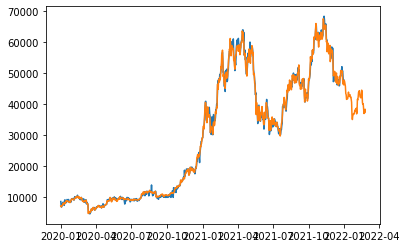

In [123]:
df_bydate_money = df_merged.groupby(df_merged['created_at'].dt.date).agg({"money" : "mean"}).reset_index()
df_bydate_money

plt.plot(df_bydate_money['created_at'],df_bydate_money['money'])
plt.plot(pd.to_datetime(df_bitcoin['datetime']),df_bitcoin['open_bitcoin'])

In [130]:
df_bydate_money['created_at'] = df_bydate_money['created_at'].astype(str)
df_merged_bydate = pd.merge(df_bydate_money,
                       df_bitcoin,
                       how = "left",
                       left_on = "created_at",
                       right_on = "datetime")
df_merged_bydate


,created_at,money,datetime,open_bitcoin
0,2020-01-01,8673.375000,2020-01-01,7200.77
1,2020-01-02,7188.000000,2020-01-02,6965.49
2,2020-01-03,6887.500000,2020-01-03,7345.00
3,2020-01-06,8346.250000,2020-01-06,7758.90
4,2020-01-07,8439.888889,2020-01-07,8145.92
...,...,...,...,...
709,2021-12-27,50600.463415,2021-12-27,50701.44
710,2021-12-28,50758.029412,2021-12-28,47543.74
711,2021-12-29,48648.030303,2021-12-29,46464.66
712,2021-12-30,47208.812500,2021-12-30,47120.88


In [131]:
df_merged_bydate['normalized_money'] = (df_merged_bydate['money'] - df_merged_bydate['open_bitcoin'])/df_merged_bydate['money']
df_merged_bydate


,created_at,money,datetime,open_bitcoin,normalized_money
0,2020-01-01,8673.375000,2020-01-01,7200.77,0.169785
1,2020-01-02,7188.000000,2020-01-02,6965.49,0.030956
2,2020-01-03,6887.500000,2020-01-03,7345.00,-0.066425
3,2020-01-06,8346.250000,2020-01-06,7758.90,0.070373
4,2020-01-07,8439.888889,2020-01-07,8145.92,0.034831
...,...,...,...,...,...
709,2021-12-27,50600.463415,2021-12-27,50701.44,-0.001996
710,2021-12-28,50758.029412,2021-12-28,47543.74,0.063326
711,2021-12-29,48648.030303,2021-12-29,46464.66,0.044881
712,2021-12-30,47208.812500,2021-12-30,47120.88,0.001863


In [134]:
df_merged_bydate[['created_at', 'normalized_money']].to_pickle("../data/cleaned/normalized_money_bydate.pkl")